In [16]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from IPython.display import Image

import pickle


# Code to run the optimization many times for different data.

The data comes from "make_histograms.ipynb"
the H_new_nolow is wrong, so ignore that for now!

# If you are here to look at the results 
# Run the first cell (above)
# And DO NOT run any cells until told otherwise

In [17]:
bin_size = 0.1 #[m/s]
max_vel = 9.3 #[m/s]
#make sure max_vel/bin_size = integer

vel = []
for i in range(int(max_vel/bin_size) + 1):
    vel.append(round(i*bin_size,2))

In [18]:
#all scaled to contain T = 250
#Montreal
H_M = [4.284176287754036, 4.242273917548089, 4.593669143042608, 4.560147246877851, 4.48979024388089, 4.523312140045647, 4.525650876987374, 4.593084458807176, 4.703005095068358, 4.743153412568009, 4.755236886766933, 4.825204100273607, 4.8579464174577875, 4.89965389291859, 4.980535212153324, 5.150483429918839, 5.313220542114026, 5.514546813847713, 5.749784771236446, 5.885431513856626, 6.0602521002507395, 6.216557685856176, 6.457252696108939, 6.672806284238134, 6.89381692523136, 7.200191464597629, 7.451605685833309, 7.764801541279616, 8.077802501980779, 8.37521188307043, 8.547109048287382, 8.897724694801324, 9.183440391182337, 9.455513455403274, 9.860894525302664, 10.088141798140496, 10.29278128054163, 10.588046819434696, 10.90007330641014, 11.090485472415768, 11.258289847984697, 11.453574382618923, 11.58902623049396, 11.687837866281935, 11.869869558246375, 12.01077845898544, 12.126545937600941, 12.209960888522545, 12.132392779955259, 12.253422416689641, 12.284605575912673, 12.268429312065727, 12.164355518158862, 12.03591988110901, 11.933795034653585, 11.784895449363617, 11.65295170690117, 11.508144911259226, 11.292201533639743, 11.219895583191342, 11.02324678534111, 10.835368251022352, 10.64027861113327, 10.343453914279054, 10.23333838327273, 9.981729267291906, 9.818017681371, 9.534640721931714, 9.282836711205746, 9.073519754921156, 8.754282162375388, 8.449856570460557, 8.210720718168947, 8.0707862911556, 7.745312066765223, 7.551002005856716, 7.301536732072476, 7.066493669428889, 6.792081868266225, 6.517475172358417, 6.255926424375252, 6.086173101354882, 5.794415667874407, 5.578862079745212, 5.36194422840001, 5.171921851884671, 4.894001945309416, 4.778039571948773, 4.596592564219768, 4.378700239148845, 4.25318802327615, 4.015806223690833, 3.8415703215321533, 3.7651715814357294] 

#new SR (with and without first two low vel (different scaling))
H_new = [125.15126558875929, 12.294530908601969, 0.0, 0.054623684829742176, 0.7353188342465292, 2.281589297119231, 4.004336280211099, 4.722847826817708, 7.399408383475075, 7.832196040203032, 10.218830885071768, 8.197754546371307, 7.701939560993647, 7.113684493596424, 6.437191166089616, 6.084238125651283, 5.991798043631719, 5.189250058825507, 5.067397223436082, 5.096809976805943, 5.0001680728763995, 4.6430132105280855, 4.710242361087768, 4.75226058018757, 5.03378264815624, 5.176644593095566, 5.584221318363642, 5.550606743083801, 5.613634071733504, 5.739688729032909, 5.680863222293186, 5.7102759756630475, 6.252311002050488, 6.504420316649298, 6.764933275068069, 7.454032068304817, 7.500252109314599, 7.958250697502437, 8.227167299741168, 8.701973175568927, 8.899458805337995, 9.357457393525833, 10.349087364281152, 10.676829473259605, 11.248277253016909, 11.508790211435677, 12.508823826010959, 12.105448922652862, 12.433191031631315, 12.80295135970957, 12.437392853541295, 12.571851154660662, 12.0340179501832, 12.660089414770244, 12.500420182190998, 12.118054388382802, 12.185283538942485, 11.83233049850415, 11.30710275975663, 11.0381861575179, 10.907929678308514, 10.56758210360012, 10.00873978957276, 9.689401324414266, 8.756596860398668, 8.596927627819422, 8.349020135130592, 7.504453931224579, 7.689334095263706, 7.815388752563111, 7.122088137416384, 6.525429426199199, 6.26491646778043, 5.764899660492789, 4.899324347036876, 4.428720293119096, 4.021143567851021, 3.5253285824733602, 3.3278429527042928, 2.916064405526236, 2.7059733100272276, 2.5463040774479815, 2.584120474637803, 2.361423913408854, 2.113516420720024, 1.7689670241016504, 1.7479579145517496, 1.554674106692662, 1.4958485999529396, 1.4244176274832767, 1.3697939426535346, 1.1555010252445461, 0.9706208612054186, 0.8109516286261723] 
H_new_nolow = [153.23288723650907, 15.053195502905004, 0.0, 0.06688022608946173, 0.9003107358196772, 2.7935355974290554, 4.902835035635157, 5.782567240350384, 9.059698318734009, 9.58959549467359, 12.511746911505456, 10.037178546195372, 9.430111878614104, 8.709863289958362, 7.881577413004259, 7.449428259810815, 7.336246338736341, 6.353621478498865, 6.204427127991605, 6.2404395574243905, 6.122113003573805, 5.684819217604248, 5.7671333420220465, 5.818579669783171, 6.163270065782704, 6.338187580170527, 6.837216959453435, 6.796059897244535, 6.87322938888622, 7.027568372169595, 6.95554351330402, 6.991555942736808, 7.655213570855313, 7.963891537422059, 8.282858769541031, 9.12657854482347, 9.183169505360707, 9.743934477956964, 10.07319097562816, 10.654534479328866, 10.89633221980615, 11.457097192402406, 12.671230527564942, 13.072511884101713, 13.772181941653006, 14.091149173771974, 15.315571774486736, 14.821687027979943, 15.222968384516715, 15.675696068814608, 15.228113017292825, 15.392741266128423, 14.734228270786032, 15.500778554426784, 15.305282508934512, 14.83712092630828, 14.91943505072608, 14.487285897532635, 13.844206800518577, 13.514950302847383, 13.355466686787898, 12.93875143192279, 12.254515272699834, 11.863523181715289, 10.721414705418328, 10.525918659926054, 10.22238532613542, 9.18831413813682, 9.414677980285767, 9.56901696356914, 8.720152555510587, 7.989614701302621, 7.670647469183649, 7.05843616882627, 5.9986418169471065, 5.422442946022513, 4.9234135667396055, 4.316346899158338, 4.074549158681053, 3.5703751466220344, 3.3131435078164118, 3.1176474623241397, 3.1639491573091516, 2.891283620175192, 2.5877502863845576, 2.165890398743338, 2.1401672348627754, 1.9035141271616032, 1.831489268296029, 1.7440305111021175, 1.6771502850126558, 1.4147740134309212, 1.188410171281974, 0.9929141257897012] 

#SR over 10 visits
H_over10_dur = [0.008413102951592253, 0.016742753351901143, 0.022489455648494295, 0.04903841111052105, 0.04902696615209263, 0.07752521931944631, 0.08342204457417524, 0.10458641019352355, 0.12519552341232149, 0.13116156637122925, 0.16723962709903384, 0.20022597716492122, 0.2500028367656602, 0.2871736072787169, 0.3250408728250832, 0.41190662353000346, 0.5067457301253492, 0.614744918116948, 0.7591555270623197, 0.913402168773775, 1.1037448131827328, 1.3643104445058225, 1.6547866793093526, 1.9755521604656843, 2.3408418257444508, 2.7819505565270055, 3.3216945323678275, 3.867861885811, 4.506195479191419, 5.188943632245337, 6.04560779802837, 6.911030559461519, 7.872340042742871, 8.950864577641179, 10.017478192254163, 11.06272445770299, 12.3543626877047, 13.559793364640766, 14.833548347394352, 16.133137409244274, 17.443636732257165, 18.855652637880933, 20.156028357764217, 21.4374669125531, 22.686951834113195, 23.795307545223544, 24.797228904675926, 25.745852208710428, 26.476143213068646, 26.881122285055447, 27.163591224370574, 27.088253239975433, 26.796558601794402, 26.22368532094284, 25.651502644615658, 24.727716116587764, 23.489435563376954, 22.15254910047271, 20.637935067011462, 19.02893163478205, 17.3853415894497, 15.647916817592838, 13.96815826888282, 12.228382236690434, 10.587312622601885, 9.10369714710636, 7.856351393309354, 6.755319932481846, 5.773857642127102, 4.93830325155745, 4.297172165032347, 3.759573362599614, 3.207034014384356, 2.7731381205052146, 2.440241513579037, 2.145222558063576, 1.8880268149689572, 1.6774470870550604, 1.4766811034760268, 1.3043484400274414, 1.1376939434378888, 1.0174367874707118, 0.91626442560101, 0.8247922327672891, 0.7385079863085243, 0.6436942137991941, 0.5832520992789328, 0.5261112852565388, 0.47381813994016597, 0.42250363316861783, 0.37932551713073626, 0.34777553386571597, 0.3116189952766607, 0.2781211919811664] 
H_over10_count = [0.0005262702532475611, 0.0008946594305208539, 0.0026839782915625615, 0.00799930784936293, 0.013262010381838541, 0.023103264117567933, 0.032155112473425985, 0.04878525247604892, 0.06162624665528941, 0.07657232184752014, 0.10462252634561514, 0.13330425514760724, 0.1683538540138948, 0.21313945256526223, 0.25366226206532444, 0.3279716218238801, 0.41685866759739315, 0.5171131508410536, 0.6486280871276191, 0.7911420717070586, 0.9683898930008372, 1.190686447972607, 1.4619787635217247, 1.759952980910494, 2.101765510394785, 2.4990469245713687, 2.9918990167377095, 3.5020654002358955, 4.112012623749819, 4.7783233913865555, 5.556308706762426, 6.339819859797394, 7.252951376207238, 8.252391214149682, 9.31029967722793, 10.340052681757431, 11.534107259350822, 12.700059005420796, 13.951108651440897, 15.244786187974052, 16.522728243935106, 17.875348048831984, 19.198707227648303, 20.49527925057432, 21.74932863703793, 22.877336297848753, 23.953506338714696, 24.88695188689989, 25.65478018638808, 26.18326077469928, 26.55180783304855, 26.611644760842797, 26.46271027917374, 26.116898095764768, 25.63436090056208, 24.81758946752186, 23.761259815203356, 22.5381551196307, 21.117172808836962, 19.604198457775546, 18.078225231458923, 16.3994231235992, 14.802456040119475, 13.09081466845711, 11.485900904153345, 10.05886648544726, 8.808448363731053, 7.681387989376078, 6.7148400422616055, 5.831758557312199, 5.158922038535192, 4.573762143949229, 3.974024563348308, 3.5164852051748783, 3.141149260558718, 2.7891797151867492, 2.513150967358403, 2.2604359917489245, 2.0206672643693357, 1.8093171306651152, 1.6102817208868876, 1.4630839310535446, 1.3299901840072363, 1.2130529337356284, 1.1006942346672741, 0.9734420874320138, 0.8933963819130597, 0.8090352603174756, 0.7454618137251704, 0.676046767321817, 0.6165782287048426, 0.5680561113554174, 0.5144817995748158, 0.47374848197345454] 

#SR 2-10 visits
H_2to10_dur = [11.50359689039278, 7.887737577047108, 6.180679405065726, 5.058553361016373, 4.321113887152223, 3.810698940216767, 3.5400114994589034, 3.2692917833717305, 3.1670284642598054, 3.109617356089125, 3.185264076437886, 3.3950835918602826, 3.6313382321039254, 4.000013935760139, 4.468340647682031, 4.941031449424703, 5.558561355312175, 6.147827793292214, 6.713594464919014, 7.199983327688591, 7.744371558208784, 8.335130506211268, 8.873974766156875, 9.420243126269042, 9.915374458893789, 10.402393326121379, 10.990773256095524, 11.455412610867773, 11.92066824792679, 12.325333058001727, 12.788861260843849, 13.311881735543759, 13.676763217444348, 14.146165895641204, 14.460409369232007, 14.82593489182468, 15.226339772887394, 15.442993553028078, 15.77187075942706, 15.901069427320532, 16.114782719246627, 16.241088229156066, 16.24121011559315, 16.31346850778167, 16.150649984211707, 16.093459543814276, 15.89659764992822, 15.667285225977459, 15.40933826026588, 15.045223836243965, 14.668003321298729, 14.228993990325161, 13.800447706420039, 13.357506493053537, 12.76735844575695, 12.214820642534061, 11.670628169311131, 11.115302919921096, 10.601944648089017, 9.991165087803102, 9.43801980440207, 8.88039412322252, 8.347918639401515, 7.81623152047937, 7.25176974228691, 6.732467425360856, 6.2413162159551305, 5.750316005363913, 5.274949269205827, 4.7507190779140265, 4.341525447761046, 3.9688637515546423, 3.619872559590811, 3.329813384588543, 3.043560560218649, 2.8236347567231754, 2.6226723067292044, 2.4215685996262493, 2.260330423397064, 2.0656350560502204, 1.9243925327376576, 1.7772771577054496, 1.6949110665470217, 1.5453074278957437, 1.4251861598259217, 1.3370009836022447, 1.2259430693731297, 1.1397035797875281, 1.0667590182815174, 0.9793988994393854, 0.9143531769383254, 0.8520448632501133, 0.7877902210157728, 0.7337448405391556] 
H_2to10_count = [0.6682589104054822, 0.7269713369097489, 0.7434501320023668, 0.750483951342925, 0.7508986088149666, 0.7630004639249228, 0.7982156336801631, 0.8335690225927506, 0.898900610965534, 0.984381480942711, 1.1087172918186052, 1.2902451184679469, 1.4939494410294416, 1.767469795735429, 2.0615387318337026, 2.4273126952268806, 2.8591707735161775, 3.2998902355598454, 3.775056983151269, 4.245217125709893, 4.770219558367063, 5.373791903134049, 5.920264378232485, 6.550973750891975, 7.134381456370416, 7.7404110306013525, 8.468764559084574, 9.057716388541055, 9.78582419407788, 10.363718490946583, 11.00995448228141, 11.772847442417286, 12.340528879326444, 13.098691672744215, 13.600918659807393, 14.215609967898756, 14.888967629441934, 15.280266063891897, 15.937912814549943, 16.286347952538122, 16.71660883167585, 17.114234631995487, 17.31492884846364, 17.739077369309793, 17.693004316860723, 17.843632483000885, 17.876851153816666, 17.802965335372505, 17.791953875837176, 17.481068275594996, 17.238677946660427, 16.928022711680487, 16.572845550350596, 16.290586673363435, 15.671103767817371, 15.185263429741912, 14.69168281885501, 14.102838493187576, 13.645102717106052, 12.934471956131572, 12.360171357353899, 11.779604823443147, 11.174988156153985, 10.614048742586538, 9.908501375065608, 9.331758904508131, 8.787282928349155, 8.19353950143797, 7.64077037583816, 6.956355181707205, 6.451194876971435, 5.964571297004342, 5.534801863759404, 5.165173121644654, 4.758732010623095, 4.47314051617545, 4.210739124793839, 3.9397681456567, 3.7171738715910854, 3.43066091609446, 3.231732833303519, 3.025709500435421, 2.9116172648873704, 2.693661011434963, 2.5006609947258025, 2.3853555021299266, 2.209832529983114, 2.0759903126185613, 1.9720802216617555, 1.8237249927757453, 1.7284612779952153, 1.620158889371598, 1.5159723601000976, 1.4323344122208832] 

#SR one visit
H_ones_dur = [22.430654660207377, 15.047902400428367, 11.648365836920059, 9.328405307293712, 7.958761162562693, 6.887886798867768, 6.374170729511321, 5.781870470935965, 5.49573812730202, 5.267658204096587, 5.330703139318455, 5.5815419432730495, 5.840374632557793, 6.341748276904306, 6.986049576930458, 7.589804231677377, 8.355484091979159, 9.014859168660854, 9.657030461909416, 10.053407744626012, 10.512040489693907, 11.075825446719596, 11.472940019206828, 11.880851978217994, 12.138540751038528, 12.355887333182434, 12.78641724908513, 12.962209099545383, 13.16046318652875, 13.18458371177558, 13.314988135112154, 13.665817613708008, 13.600176334670795, 13.804322006647428, 13.737789327003917, 13.77791416866147, 13.909962550780275, 13.783073024408967, 13.917403808015093, 13.672127316890085, 13.618383854904724, 13.522419804903242, 13.286720244645341, 13.166802957691772, 12.728335329082611, 12.530927738963966, 12.203210780100912, 11.875441933529501, 11.598247596691849, 11.187384838235873, 10.823387743592733, 10.449619268833764, 10.08493985847061, 9.799064534000433, 9.345833748518931, 8.936644271695258, 8.572293158254494, 8.214969667527908, 7.9414329085562265, 7.507899475825104, 7.222152133205883, 6.912551648588672, 6.591151108457207, 6.3018227293586015, 5.888348907955818, 5.600897788560808, 5.277278978433629, 4.928859213144572, 4.548643336281754, 4.095003547018218, 3.773299280716492, 3.470853906391599, 3.1960028435171255, 2.9700807363221102, 2.737289699017488, 2.569073811534854, 2.431060965524193, 2.273329089092688, 2.1479417437317063, 1.9850124437644276, 1.8796929951864991, 1.7475927780854867, 1.7035695705820744, 1.5616371403156024, 1.4511588815530487, 1.3782817486451042, 1.2803256068057243, 1.204449985107463, 1.138697951916656, 1.0556069113128281, 0.9901254479065671, 0.9287679500531862, 0.868717353902359, 0.8110115371289692] 
H_ones_count = [1.4414788145430464, 1.5329683275761503, 1.5369719205289765, 1.5211058299381464, 1.4959350927625075, 1.488817594179705, 1.5266293054008417, 1.5474257465724672, 1.6270527619675672, 1.7310720381308122, 1.9193891881341216, 2.2035330768694297, 2.5066940321306626, 2.9265523079057565, 3.3651681580709445, 3.9150319938975358, 4.5474143289184905, 5.122856675277028, 5.781892559678372, 6.304361440022199, 6.913686045259284, 7.650310078274197, 8.173001380448737, 8.883564988965158, 9.366146221001198, 9.866298777663529, 10.623422689409116, 11.001057887653943, 11.69534763222323, 11.92670340646942, 12.362205351004633, 13.09089633872413, 13.256563532299875, 13.926275664575423, 14.009424358956805, 14.3316765213542, 14.884357700369819, 14.853885909562196, 15.412794899837765, 15.336244719767524, 15.505322381414196, 15.716215347234831, 15.585764943521907, 15.936635381470985, 15.495758242693553, 15.45097731411009, 15.338135305328578, 15.108336483897377, 15.141959250640094, 14.627608767117275, 14.33742241864761, 14.09494555286579, 13.716791370349302, 13.680017627671491, 13.030323460160075, 12.708219578983153, 12.326988561141809, 11.918622079953533, 11.773232343277748, 11.117310364506379, 10.822341946676392, 10.497865565971873, 10.07641326707667, 9.844872141304885, 9.211266486215012, 8.857764056602502, 8.471194914824054, 8.005591882532407, 7.56968216464089, 6.858859063988635, 6.411457551510301, 5.976771153687702, 5.597653143238127, 5.309950505211417, 4.891723322861549, 4.64802313701081, 4.443395052755245, 4.199917288735219, 4.038439039637893, 3.720079259277968, 3.5687212034780647, 3.3750659295376537, 3.323315783591862, 3.077168957603285, 2.860567164794361, 2.772673471357777, 2.5912513981065572, 2.4701056409784448, 2.3631207404056984, 2.1884825329912125, 2.1056304010507803, 1.9774412859501023, 1.8770548996884957, 1.7793375753954401]


H_name = ["H_M", "H_new", "H_new_nolow", "H_over10_dur", "H_over10_count", "H_2to10_dur", "H_2to10_count", "H_ones_dur","H_ones_count"]
H_list = [H_M, H_new, H_new_nolow, H_over10_dur, H_over10_count, H_2to10_dur, H_2to10_count, H_ones_dur,H_ones_count]

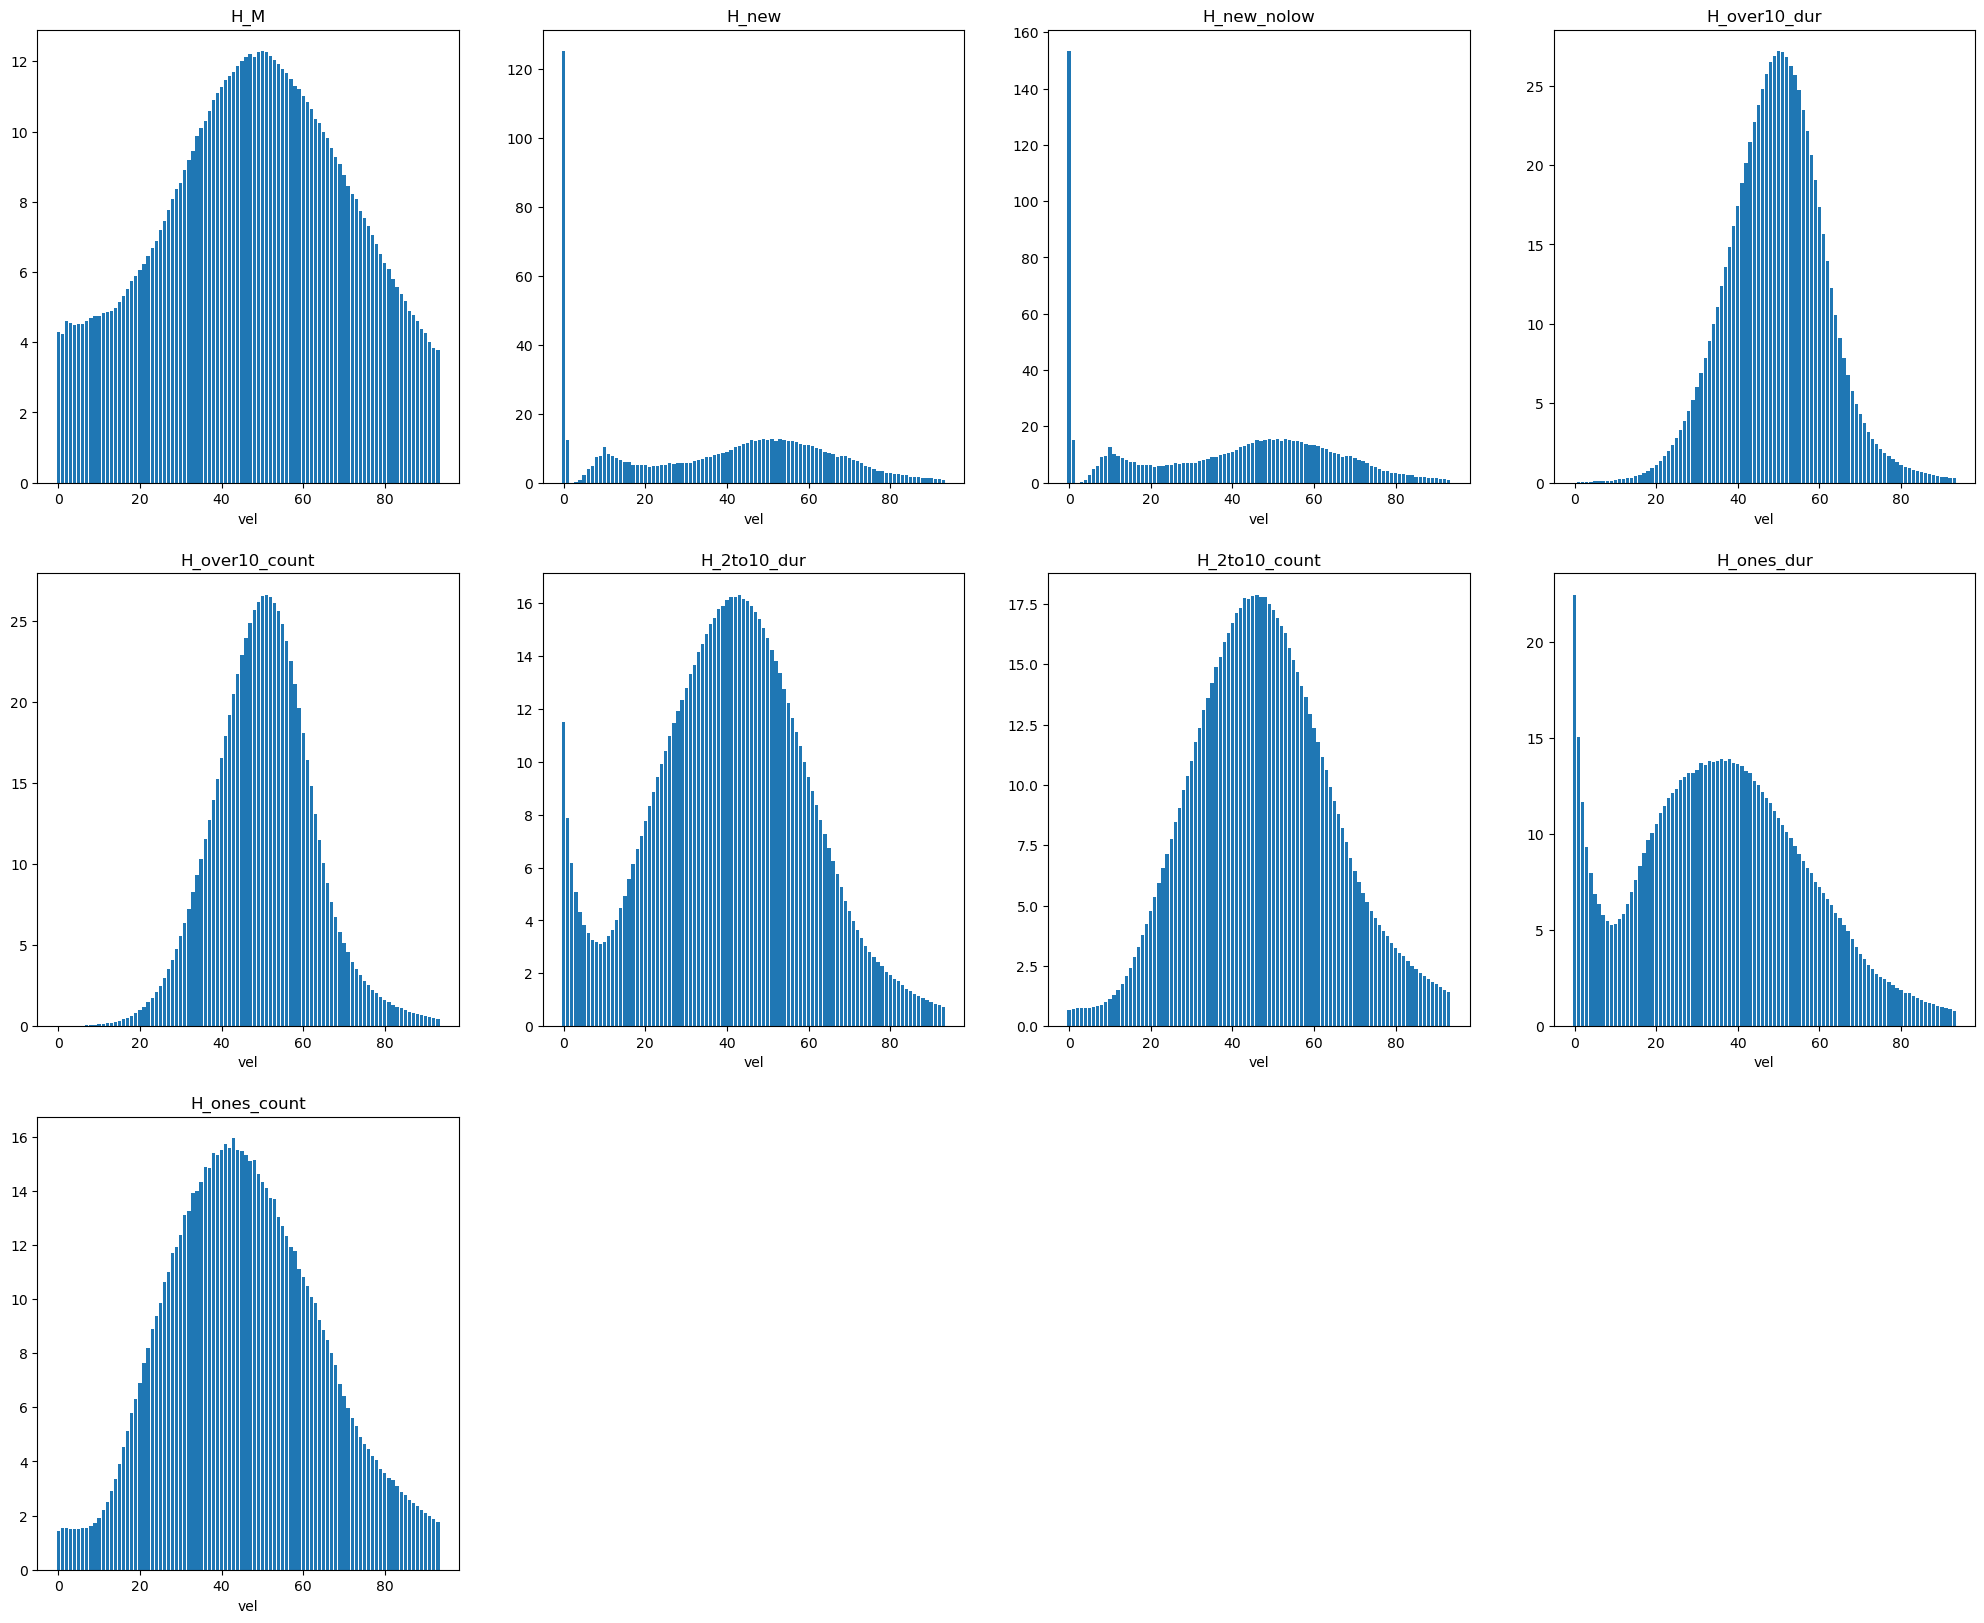

In [53]:
fig = plt.figure(figsize=(25, 20))

for i in range(len(H_list)):
    plt.subplot(3,4, i + 1)
    plt.xlabel("vel")
    plt.bar([x for x in range(len(H_list[i]))], H_list[i])        #switch these two if you want correct scale on x-axis
    #plt.bar([x/10 for x in range(len(H_list[i]))], H_list[i])    #switch these two if you want correct scale on x-axis
    plt.title(H_name[i])


    
#the x-axis is in m/s * 1/10 (so between 0-9.3 m/s) 
#the reason for this is that the plots look somewhat messy when I choose a different scale on the x-axis 

plt.show()

In [19]:

### Input

m_bike = 18.3 #[kg] mass of bike
m_human = 73.5 #mass of cyclist
mass = m_human+m_bike
level = "fit"



### Parameters
E_output = {"untrained": 1.5, "fit": 3.0, "highP": 5.0} #[W/kg]
P_max = m_human*E_output[level] #[W]

g = 9.81 # [m/s²]
RRcoef = 0.008 # [1]  % Rolling Resistance coefficient #####Changed!!! OK!
cw = 1 # [1]  
A = 0.5 # [m^2] % frontal area bike and cyclist
s = 0 #[rad] degree of slope
 
# Air density 
temp = 20 # [degree]
Temp = 273.15 + temp
rho = (10**(-5))*(Temp**2) - 0.0048*Temp + 1.2926 #which to use?

### Add limits on breaking here
decel = -2 #m/s^2

In [20]:
dt = 2 #[s]; time step; divisible by 60; (dt | 60)

def acc_fun(v):
    #takes v=velocity as an argument
    #returns acceleration as a function of v
    if v == 0: #to avoid dividing with zero
        acc = 2
    else: 
        P_roll_steady = mass * g * RRcoef * v
        P_air_steady = 0.5 * cw * A * rho * (v**3)
        P_climb_steady = (mass)*g*s
        P_lost = P_roll_steady + P_air_steady + P_climb_steady

        P_acc = P_max - P_lost
        acc = P_acc/(mass*v)
    acc = min(2, acc) #max 2m/s
    acc = max(acc,0) #not negative
    return acc
                         
#create lists of highest/lowest possible velocity "u" you could reach from current velocity v
#rough discretization, maybe fine-tune slightly
u_max = []
u_min = []
for v in vel:
    a = acc_fun(v)
    u_max.append(v+a*dt)
    u_min.append(max(0,v+decel*dt))

    
#create U_v = {u, v ∈ V : u ≤ v + a(v) · ∆t} ∩ U_w,     v < w
induced_sets = []
old_max = len(vel) + 1 

for j in range(len(vel)):
    k = len(vel) - j - 1 #going backwards to be able to correct errors due to step-size
    uSet = []
    for i in range(len(vel)):
        if vel[i] <= u_max[k]: # u[k] corresponds to (index of) max(u in U_w), where w = v + |h| 
            if i <= old_max: #This ensures that v_poss <= w_poss if v < w
                uSet.append(i)
    induced_sets.append(uSet)
    old_max = uSet[-1]
    
induced_sets.reverse()

#Remove unfeasible vel due to deceleration limit
for i in range(len(u_min)):
    lowest_vel = u_min[i]
    idx = 0
    for j in range(len(u_min)):
        if lowest_vel >= vel[j]:
            idx = j
    induced_sets[i] = induced_sets[i][idx::]


#Below deletes all unfeasible velocities, this is not great but right now the code cannot deal with it anyways, 
#so we might as well
#These exist because at a certain point (v ~ 12 m/s) we have negative (here zero) acceleration due to lack of power (or down-hill slopes)

#When this happens in the induced_sets we get that u_max = v + 0*dt = v
#so we delete all sets where u_max[i] = induced_sets[i][-1] = v[i]   
#in python [-1] denotes last elem in list
#first: find last index where u_max > v
to_del = len(vel)+2
for i in range(len(induced_sets)):
    if induced_sets[i][-1] <= i:
        #print(induced_sets[i][-1],i)
        to_del = min(to_del, i)

#second: delete all sets above that
if to_del <= len(vel):
    induced_sets = induced_sets[:to_del]

#third: append one last set (since we can stay at top speed if we want)
induced_sets.append(induced_sets[-1])


# Creates a "truth-table";
# U_truth[i][j] = 1  if we can reach u[j] from v[i]
# U_truth[i][j] = 0  else
U_truth = []
for i in range(len(induced_sets)):
    v_set = []
    for j in range(len(induced_sets)):
        if j in induced_sets[i]:
            v_set.append(1)
        else:
            v_set.append(0)
    U_truth.append(v_set)


## parameters set above, model run below. 
It will run the optimization for all histograms defined above,
and save according to:

    model_dic[key] = m
    x_dic[key] = list(m.getAttr("X", x).values())
    obj_dic[key] = m.getObjective().getValue()


In [21]:
cycle_length = 25 #[min]; length of cycle

T = int(cycle_length*60/dt) #total number of time steps
v_0 = vel[0] 
C = 1
V_p = vel[0:len(U_truth)-1] #rewrite to match notation in other model: average-obj-fun
T_idx = [t for t in range(T)]         #create a vector with all timesteps t
Vp_idx = [i for i in range(len(V_p))] #create a vector of idx for velocities 
I = len(Vp_idx)-1 #Python starts from zero


model_dic = {}
obj_dic = {}
x_dic = {}
for iidx in range(len(H_list)):
    key = H_name[iidx]
    
    print(" * * * * *","\n\n\n", H_name[iidx], "\n\n\n", "* * * * *")
    H = H_list[iidx]
    ti_pair = [(t,i) for t in T_idx for i in Vp_idx] 

    coeff_ti = {}
    for k in range(len(ti_pair)):
        coeff_ti.update({ti_pair[k]: V_p[ti_pair[k][1]]})  

    #model
    try:
        m = gp.Model("DF")

        b = m.addVars(ti_pair, vtype=GRB.BINARY, name="b") #b(t,i) binary variables (if = 1; choose velocity "vel[i]" at time "t")
        x = m.addVars(T_idx, name="x") #velocity at time t 

        help_U_v = m.addVars(ti_pair, name="U_v") #Helper function to constraint (c) 
                                                  #Help_U_v[t,i] = sum(j in U_i, b(t,j))

        # diff, u and obj together corresponds to (a) - the objective function:
        diff = m.addVars(Vp_idx, lb = -C*T, name="diff")   #diff(i) = h(i) - C*sum(t, b(t,i)) - see constraint "defDiff"
        help_abs = m.addVars(Vp_idx, name="help_abs")      #help_abs(i) = abs(diff(i)) - see constraint "absDiff"
        obj = sum(help_abs[i] for i in Vp_idx)             #objective = sum(i, help_abs(i))
        ###Model

        #Objective function (a)
        m.setObjective(obj, GRB.MINIMIZE)

        #constraints that help define the variables u(v) in the objective function:
        m.addConstrs((diff[i] == H[i] - C*b.sum("*",i) for i in Vp_idx), "defDiff")
        m.addConstrs((help_abs[i] == gp.abs_(diff[i]) for i in Vp_idx), "absDiff")


        #constraint (b);    
        m.addConstr((b[0, 0] == 1), "start")  # initial speed = V_p[0]
        m.addConstr((b[T - 1, 0] == 1), "end")  # final speed = V_p[0]

        #constraint (c);

        #This is the only way I got this constraint to work
        #First: assign help_U_v[t,i] = sum(b[t,j]*U_truth[i][j]) for every (t,i)
        for t in T_idx:
            for i in Vp_idx:
                expr = gp.LinExpr()
                for j in Vp_idx:
                    expr.add(b[t,j]*U_truth[i][j])
                m.addConstr(help_U_v[t,i] == expr)

        #Second: b[t,i] <= sum(b[t+1,j]*U_truth[i][j])
        m.addConstrs(b[t,i] <= help_U_v[t+1, i] for t in T_idx[0:-1] for i in Vp_idx)

        #constraint (d);
        m.addConstrs((b.prod(coeff_ti,t,"*") == x[t] for t in T_idx), "assignSpeed") #set speed for time t

        #constraint (e);
        m.addConstrs((b.sum(t,"*") == 1 for t in T_idx), "binaryConstraint") #keep tack of binary variables


        m.optimize()
        #for v in m.getVars():
        #    print('%s %g' % (v.VarName, v.X))

        print('Obj: %g' % m.ObjVal)

    except gp.GurobiError as e:
        print('Error code ' + str(e.errno) + ': ' + str(e))

    except AttributeError:
        print('Encountered an attribute error')
    
    model_dic[key] = m
    x_dic[key] = list(m.getAttr("X", x).values())
    obj_dic[key] = m.getObjective().getValue()

    
    
#Save the objective values and the solution for x

with open('x_dic.pickle', 'wb') as handle:
    pickle.dump(x_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('obj_dic.pickle', 'wb') as handle:
    pickle.dump(obj_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

 * * * * * 


 H_M 


 * * * * *
Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-16
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) M-5Y31 CPU @ 0.90GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 132002 rows, 131424 columns and 3315665 nonzeros
Model fingerprint: 0x6aa81696
Model has 87 general constraints
Variable types: 66174 continuous, 65250 integer (65250 binary)
Coefficient statistics:
  Matrix range     [1e-01, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 8e+02]
  RHS range        [1e+00, 1e+01]
Presolve removed 49719 rows and 49848 columns (presolve time = 5s) ...
Presolve removed 75202 rows and 49863 columns (presolve time = 10s) ...
Presolve removed 75062 rows and 49904 columns
Presolve time: 13.68s
Presolved: 56940 rows, 81520 columns, 1232553 nonzeros
Variable types: 174 continuous, 81346 integer (66452 binary)
Fo


Optimal solution found (tolerance 1.00e-04)
Best objective 3.248766719045e+01, best bound 3.248766719045e+01, gap 0.0000%
Obj: 32.4877
 * * * * * 


 H_new 


 * * * * *
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) M-5Y31 CPU @ 0.90GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 132002 rows, 131424 columns and 3315665 nonzeros
Model fingerprint: 0xe832efaf
Model has 87 general constraints
Variable types: 66174 continuous, 65250 integer (65250 binary)
Coefficient statistics:
  Matrix range     [1e-01, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 8e+02]
  RHS range        [5e-02, 1e+02]
Presolve removed 49865 rows and 49865 columns (presolve time = 5s) ...
Presolve removed 75211 rows and 49872 columns (presolve time = 10s) ...
Presolve removed 75065 rows and 49906 columns
Presolve time: 12.37s
Presolved: 56937 rows, 81518 columns, 1231800 nonzeros
Variable types: 

   2   3.93284795e+04 -5.98659215e+05  1.54e+03 7.40e-01  9.73e+01    19s
   3   3.93442499e+04 -6.44539622e+05  1.19e+03 3.97e-01  7.34e+01    19s
   4   2.55407771e+04 -6.47034003e+05  2.60e+02 3.13e-02  1.78e+01    20s
   5   9.67020537e+03 -5.17572773e+05  9.19e+01 1.34e-02  7.25e+00    21s
   6   4.59145493e+03 -2.76792738e+05  2.96e+01 8.88e-14  2.53e+00    22s
   7   2.76288456e+03 -9.48512317e+04  7.63e+00 2.09e-14  7.11e-01    23s
   8   1.15857629e+03 -4.65879905e+04  2.02e+00 1.15e-14  2.90e-01    25s
   9   8.46983776e+02 -2.04737703e+04  1.40e+00 1.01e-14  1.28e-01    26s
  10   4.65929286e+02 -3.92064977e+03  6.62e-01 5.58e-15  2.69e-02    27s
  11   3.04431911e+02 -1.51813301e+03  4.03e-01 3.19e-15  1.06e-02    28s
  12   2.89515009e+02 -1.36110787e+03  3.60e-01 2.66e-15  9.43e-03    28s
  13   2.57753904e+02 -9.47979210e+02  3.05e-01 1.82e-15  6.78e-03    29s
  14   2.26567195e+02 -6.53474313e+02  2.21e-01 2.66e-15  4.81e-03    30s
  15   1.89219805e+02 -2.64033942e+02 

Total elapsed time = 126.25s
Total elapsed time = 149.33s
Total elapsed time = 184.61s

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.73927    0 3763 1408.39534    2.73927   100%     -  217s
H    0     0                     423.5812194    2.73927  99.4%     -  220s
H    0     0                     137.2009820    2.73927  98.0%     -  220s
H    0     0                      83.0576247    2.73927  96.7%     -  221s
     0     0   12.24944    0 3478   83.05762   12.24944  85.3%     -  275s
H    0     0                      55.4828084   12.24944  77.9%     -  290s
     0     0   12.35289    0 3387   55.48281   12.35289  77.7%     -  291s
     0     0   12.35289    0 3404   55.48281   12.35289  77.7%     -  292s
     0     0   20.38650    0 3593   55.48281   20.38650  63.3%     -  325s
H    0     0                      46.7383470   20.38650  56.4%     -  327s
     0     


Barrier solved model in 24 iterations and 99.01 seconds (17.09 work units)
Optimal objective 4.40340849e+00


Root crossover log...

      79 DPushes remaining with DInf 0.0000000e+00               100s
       0 DPushes remaining with DInf 0.0000000e+00               100s

   64207 PPushes remaining with PInf 0.0000000e+00               101s
   39149 PPushes remaining with PInf 0.0000000e+00               106s
   13672 PPushes remaining with PInf 0.0000000e+00               110s
    5566 PPushes remaining with PInf 0.0000000e+00               115s
    2813 PPushes remaining with PInf 0.0000000e+00               120s
    1372 PPushes remaining with PInf 0.0000000e+00               125s
       0 PPushes remaining with PInf 0.0000000e+00               130s

  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7431390e-12    130s


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   64287    4.4034085e+00   0.000000e+00   0.000000e+00    130s
Concurrent sp

   6   1.35786652e+02 -9.84377786e+02  2.42e-01 4.90e-15  6.38e-03    27s
   7   3.14083611e+01 -1.59861354e+02  6.85e-02 1.78e-15  1.02e-03    28s
   8   1.46076004e+01 -5.43502401e+01  2.49e-02 2.66e-15  3.53e-04    29s
   9   1.16859111e+01 -1.83894688e+01  1.34e-02 1.60e-14  1.51e-04    30s
  10   6.73421003e+00  1.17256836e-01  1.24e-04 2.66e-15  3.27e-05    31s
  11   6.49384422e+00  6.46458229e+00  1.68e-06 1.78e-15  1.45e-07    32s
  12   6.47381462e+00  6.47378541e+00  4.72e-09 1.78e-15  1.45e-10    33s
  13   6.47379648e+00  6.47379459e+00  4.91e-07 1.78e-15  1.45e-13    33s

Barrier solved model in 13 iterations and 33.48 seconds (14.63 work units)
Optimal objective 6.47379648e+00


Root crossover log...

      60 DPushes remaining with DInf 0.0000000e+00                34s
       0 DPushes remaining with DInf 0.0000000e+00                34s

   64205 PPushes remaining with PInf 0.0000000e+00                34s
   46034 PPushes remaining with PInf 0.0000000e+00             

Found heuristic solution: objective 1406.8193727
Deterministic concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.75s

Barrier statistics:
 AA' NZ     : 2.643e+06
 Factor NZ  : 6.198e+06 (roughly 100 MB of memory)
 Factor Ops : 9.039e+08 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.29810547e+04 -5.83499309e+05  1.20e+03 9.95e-01  7.77e+01    21s
   1   3.06205840e+04 -5.86105678e+05  1.01e+03 9.25e-01  6.62e+01    22s
   2   2.77543090e+04 -5.94479316e+05  8.21e+02 6.79e-01  5.32e+01    22s
   3   2.40637539e+04 -6.23014343e+05  2.74e+02 1.03e-01  1.87e+01    23s
   4   9.66025568e+03 -5.00941009e+05  7.51e+01 4.88e-02  6.39e+00    24s
   5   3.92004145e+03 -3.48952574e+05  2.20e+01 2.29e-02  2.72e+00    25s
   6   2.15585193e+03 -8.61437628e+04  6.94e+00 6.71e-04  6.39e-01    25s


  Cover: 256
  Implied bound: 1440
  Clique: 4868
  MIR: 194
  StrongCG: 1
  Zero half: 329
  RLT: 44
  Relax-and-lift: 1042

Explored 190 nodes (1189175 simplex iterations) in 2138.57 seconds (1469.17 work units)
Thread count was 4 (of 4 available processors)

Solution count 10: 23.3273 23.6979 25.7919 ... 57.1463

Optimal solution found (tolerance 1.00e-04)
Best objective 2.332728330676e+01, best bound 2.332696747070e+01, gap 0.0014%
Obj: 23.3273
 * * * * * 


 H_ones_dur 


 * * * * *
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) M-5Y31 CPU @ 0.90GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 132002 rows, 131424 columns and 3315665 nonzeros
Model fingerprint: 0xc3188f15
Model has 87 general constraints
Variable types: 66174 continuous, 65250 integer (65250 binary)
Coefficient statistics:
  Matrix range     [1e-01, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 8

Thread count was 4 (of 4 available processors)

Solution count 10: 22.7341 22.7743 23.695 ... 156.943

Optimal solution found (tolerance 1.00e-04)
Best objective 2.273406467314e+01, best bound 2.273403343323e+01, gap 0.0001%
Obj: 22.7341
 * * * * * 


 H_ones_count 


 * * * * *
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) M-5Y31 CPU @ 0.90GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 132002 rows, 131424 columns and 3315665 nonzeros
Model fingerprint: 0x8342b7ce
Model has 87 general constraints
Variable types: 66174 continuous, 65250 integer (65250 binary)
Coefficient statistics:
  Matrix range     [1e-01, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 8e+02]
  RHS range        [1e+00, 2e+01]
Presolve removed 49865 rows and 49865 columns (presolve time = 5s) ...
Presolve removed 75211 rows and 49872 columns (presolve time = 10s) ...
Presolve removed 75065 rows an

    13    16   24.61809    5 3381   25.07788   24.61809  1.83%  3562  994s
    17    19   24.61809    6 3538   25.07788   24.61809  1.83%  3663 1010s
    20    22   24.61809    7 3173   25.07788   24.61809  1.83%  3451 1034s
    23    25   24.61809    8 3287   25.07788   24.61809  1.83%  3571 1058s
H   26    38                      24.6197849   24.61809  0.01%  3434 1108s

Cutting planes:
  Gomory: 18
  Cover: 291
  Implied bound: 1221
  Clique: 4801
  MIR: 196
  Zero half: 318
  RLT: 14
  Relax-and-lift: 1089

Explored 39 nodes (533893 simplex iterations) in 1108.26 seconds (729.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 10: 24.6198 25.0779 25.1557 ... 246.71

Optimal solution found (tolerance 1.00e-04)
Best objective 2.461978485680e+01, best bound 2.461808752058e+01, gap 0.0069%
Obj: 24.6198


# Start from here

In [ ]:
#Open dictionaries with objective value: "obj_val_dic" and the x-vector: "x_val_dic"

with open('x_dic.pickle', 'rb') as handle:
    x_val_dic = pickle.load(handle)

with open('obj_dic.pickle', 'rb') as handle:
    obj_val_dic = pickle.load(handle)

In [55]:
#The keys are the names from the H_name list, i.e.:
#H_name = ["H_M", "H_new", "H_new_nolow", "H_over10_dur", "H_over10_count", "H_2to10_dur", "H_2to10_count", "H_ones_dur","H_ones_count"]

#We can loop through the dic like this:

for key, val in obj_dic.items():
    print(key, val)

H_M : 32.487667190451134
H_new : 22.816430804396642
H_new_nolow : 157.53380023728892
H_over10_dur : 21.033596141983256
H_over10_count : 22.137396111619598
H_2to10_dur : 22.904950047253706
H_2to10_count : 23.327283306762308
H_ones_dur : 22.734064673142967
H_ones_count : 24.619784856799512


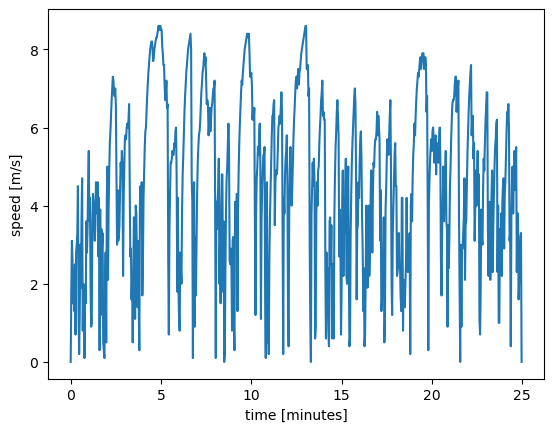

In [31]:
#We can plot the velocity for one of the models like this

plt.plot([k*dt/60 for k in T_idx],list(x_dic["H_M"]))
plt.xlabel("time [minutes]")
plt.ylabel("speed [m/s]")

plt.show()